In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
 dataset=pd.read_csv('CaseStudy-AlumniData.csv',delimiter=';')

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dataset))
# Ukuran Data
N, P = dataset.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 210, ', Kolom = ', 15)

In [ ]:
# "Mengintip" beberapa data pertamanya
dataset.head(7)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15
5,6,7/25/2023 9:46,2019.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Account Payable Accountant,NaN,NaN,NaN,NaN,4.0,1.0,6
6,7,7/25/2023 9:46,2009.0,2013.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Category Management,NaN,NaN,NaN,NaN,3.0,2.0,NaN


In [ ]:
# "Mengintip" beberapa data akhirnya
dataset.tail(9)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
201,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# chosen at random
dataset.sample(10)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
156,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,32,7/27/2023 20:03,2017.0,2022.0,Karyawan Swasta,6-12 bulan,NaN,Guru Honorer Matematika,NaN,NaN,NaN,NaN,5.0,5.0,NaN
148,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,67,7/28/2023 3:23,2017.0,2023.0,Melamar Pekerjaan,Belum mendapatkan pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN
116,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,95,7/28/2023 11:15,2006.0,2010.0,Dosen,Kurang dari 3 bulan.,2011,Dosen,Institut Teknologi Bandung,Matematika,NaN,NaN,5.0,5.0,"3,5"
169,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,7/25/2023 10:00,2009.0,2015.0,Karyawan Swasta,Kurang dari 3 bulan.,-,Sekretaris Yayasan & Administrasi Kependidikan,-,-,-,-,5.0,3.0,5


In [ ]:
dataset.shape

(210, 15)

In [ ]:
#mengecek apakah ada duplikat data?
print(dataset.shape)
dataset.duplicated().sum()

(210, 15)


0

In [ ]:
#cek missing value
dataset.isnull().sum()

Alumni-ID                                                                                         0
Timestamp                                                                                       100
Tahun Masuk                                                                                     100
Tahun Wisuda                                                                                    100
Status saat ini:                                                                                100
Waktu Mendapatkan Pekerjaan:                                                                    100
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    186
Posisi anda saat ini di tempat bekerja saat Ini:                                                126
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   186
Nama jurusan/program studi setelah S1                                                           186


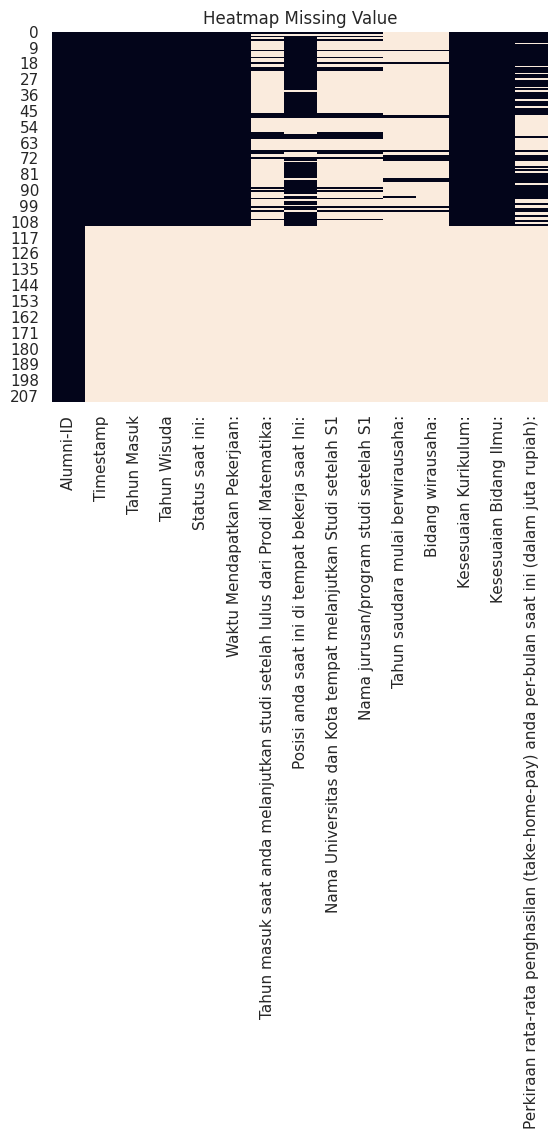

In [ ]:
sns.heatmap(dataset.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
(dataset.isnull().sum()/len(dataset)).to_frame('persentase missing')

,persentase missing
Alumni-ID,0.000000
Timestamp,0.476190
Tahun Masuk,0.476190
Tahun Wisuda,0.476190
Status saat ini:,0.476190
Waktu Mendapatkan Pekerjaan:,0.476190
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,0.885714
Posisi anda saat ini di tempat bekerja saat Ini:,0.600000
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,0.885714
Nama jurusan/program studi setelah S1,0.885714


In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties
dataset.columns

Index(['Alumni-ID', 'Timestamp', 'Tahun Masuk', 'Tahun Wisuda',
       'Status saat ini:', 'Waktu Mendapatkan Pekerjaan:',
       'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:',
       'Posisi anda saat ini di tempat bekerja saat Ini:',
       'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1',
       'Nama jurusan/program studi setelah S1',
       'Tahun saudara mulai berwirausaha:', 'Bidang wirausaha:',
       'Kesesuaian Kurikulum:', 'Kesesuaian Bidang Ilmu:',
       'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'],
      dtype='object')

In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Alumni-ID                                                                                     210 non-null    int64  
 1   Timestamp                                                                                     110 non-null    object 
 2   Tahun Masuk                                                                                   110 non-null    float64
 3   Tahun Wisuda                                                                                  110 non-null    float64
 4   Status saat ini:                                                                              110 non-null    object 
 5   Waktu Mendapatkan Pekerjaan: 

In [ ]:
#menghapus beberapa kolom (Alumni-ID, Timestamp,Tahun saudara mulai berwirausaha dan Bidang wirausaha:)
dataset1=dataset.drop(["Alumni-ID","Timestamp","Tahun saudara mulai berwirausaha:", "Bidang wirausaha:"], axis=1)
#Menghapus beberapa baris (baris yang dihapus adalah baris dengan indeks 109-209 ada 100 baris karena tidak ada data hanya ada Alumni-ID)
dataset2=dataset1.drop(dataset1.index[109:210])

In [ ]:
dataset2

,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,3.0,3.0,4
1,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,3.0,3.0,6
2,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5.0,5.0,5
3,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,3.0,3.0,8
4,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,4.0,3.0,15
...,...,...,...,...,...,...,...,...,...,...,...
104,2015.0,2020.0,Karyawan Swasta,6-12 bulan,NaN,Finance Staff,NaN,NaN,4.0,2.0,4
105,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,4.0,4.0,NaN
106,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,4.0,4.0,NaN
107,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,3.0,3.0,"4,5"


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Tahun Masuk                                                                                   109 non-null    float64
 1   Tahun Wisuda                                                                                  109 non-null    float64
 2   Status saat ini:                                                                              109 non-null    object 
 3   Waktu Mendapatkan Pekerjaan:                                                                  109 non-null    object 
 4   Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                  24 non-null     object 
 5   Posisi anda saat ini di tempa

In [ ]:
#Merubah tipe dataset
dataset2['Status saat ini:'] = dataset2['Status saat ini:'].astype('category')
dataset2['Waktu Mendapatkan Pekerjaan:'] = dataset2['Waktu Mendapatkan Pekerjaan:'].astype('category')
dataset2['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'] = dataset2['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'].astype('category')
dataset2['Nama jurusan/program studi setelah S1'] = dataset2['Nama jurusan/program studi setelah S1'].astype('category')

In [ ]:
dataset2.dtypes

Tahun Masuk                                                                                      float64
Tahun Wisuda                                                                                     float64
Status saat ini:                                                                                category
Waktu Mendapatkan Pekerjaan:                                                                    category
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                      object
Posisi anda saat ini di tempat bekerja saat Ini:                                                  object
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   category
Nama jurusan/program studi setelah S1                                                           category
Kesesuaian Kurikulum:                                                                            float64
Kesesuaian Bidang Ilmu:                                

In [ ]:
#cek missing value
dataset2.isnull().sum()

Tahun Masuk                                                                                      0
Tahun Wisuda                                                                                     0
Status saat ini:                                                                                 0
Waktu Mendapatkan Pekerjaan:                                                                     0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    85
Posisi anda saat ini di tempat bekerja saat Ini:                                                26
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   85
Nama jurusan/program studi setelah S1                                                           85
Kesesuaian Kurikulum:                                                                            0
Kesesuaian Bidang Ilmu:                                                                          0
Perkiraan 

In [ ]:
dataset2.columns

Index(['Tahun Masuk', 'Tahun Wisuda', 'Status saat ini:',
       'Waktu Mendapatkan Pekerjaan:',
       'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:',
       'Posisi anda saat ini di tempat bekerja saat Ini:',
       'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1',
       'Nama jurusan/program studi setelah S1', 'Kesesuaian Kurikulum:',
       'Kesesuaian Bidang Ilmu:',
       'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'],
      dtype='object')

In [ ]:
#replace data yang diubah ke dataset
#fill atribut numeric dengan mean (rata-rata), atribut categorial dengan mode
atribut_kategorial=dataset2.select_dtypes(include=['object','category'])
atribut_numerik=dataset2.select_dtypes(include='number')
atribut_kategorial.fillna(atribut_kategorial.mode().iloc[0],inplace=True)
atribut_numerik.fillna(atribut_numerik.mean(),inplace=True)
dataset3=pd.concat([atribut_kategorial,atribut_numerik],axis=1)

In [ ]:
dataset3

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
dataset3.isnull().sum()

Status saat ini:                                                                                0
Waktu Mendapatkan Pekerjaan:                                                                    0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    0
Posisi anda saat ini di tempat bekerja saat Ini:                                                0
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   0
Nama jurusan/program studi setelah S1                                                           0
Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):    0
Tahun Masuk                                                                                     0
Tahun Wisuda                                                                                    0
Kesesuaian Kurikulum:                                                                           0
Kesesuaian Bidang Il

In [ ]:
# Saving the preprocessed Data for future use/analysis
dataset3=dataset3

In [ ]:
dataset3

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
dataset3.describe()

,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
count,109.000000,109.000000,109.000000,109.000000
mean,2014.045872,2018.889908,3.880734,3.559633
std,4.861766,4.955990,0.879023,1.049084
min,2000.000000,2006.000000,1.000000,1.000000
25%,2011.000000,2016.000000,3.000000,3.000000
50%,2016.000000,2021.000000,4.000000,4.000000
75%,2017.000000,2022.000000,4.000000,4.000000
max,2019.000000,2023.000000,5.000000,5.000000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
dataset3.describe(include='all')

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
count,109,109,109,109,109,109,109,109.000000,109.000000,109.000000,109.000000
unique,11,7,14,73,17,15,21,NaN,NaN,NaN,NaN
top,Karyawan Swasta,Kurang dari 3 bulan.,-,-,-,-,6,NaN,NaN,NaN,NaN
freq,69,60,91,30,91,91,60,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.045872,2018.889908,3.880734,3.559633
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.861766,4.955990,0.879023,1.049084
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,2006.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2016.000000,3.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,2021.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,2022.000000,4.000000,4.000000


<function matplotlib.pyplot.show(close=None, block=None)>

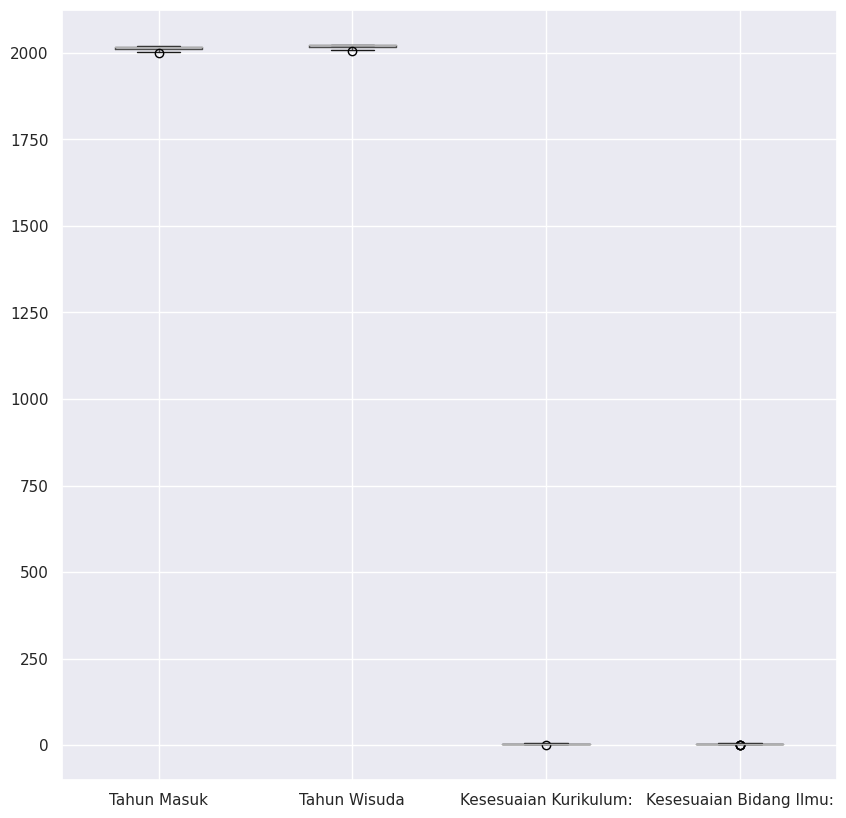

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset3.boxplot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

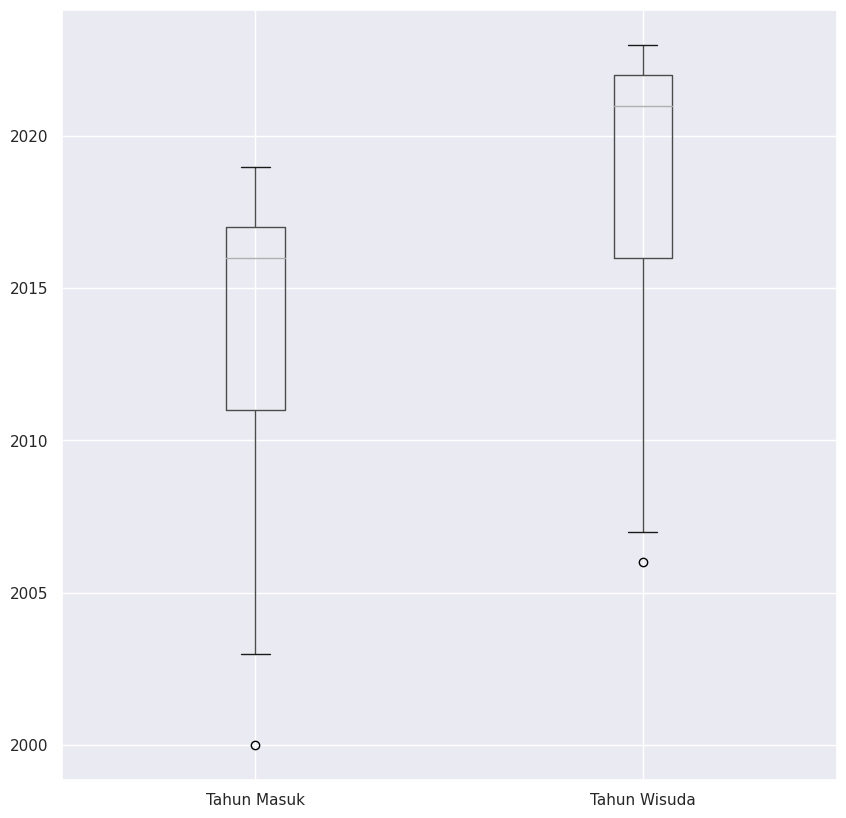

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset3.boxplot(column=['Tahun Masuk','Tahun Wisuda'])
plt.show

In [ ]:
Q1 = dataset3['Tahun Masuk'].quantile(0.25)
Q2 = dataset3['Tahun Masuk'].quantile(0.50)
Q3 = dataset3['Tahun Masuk'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset3['Tahun Masuk'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset3['Tahun Masuk'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Angkatan Lama = dataset3.loc[outliers_bawah]
#Angkatan Baru  = dataset3.loc[outliers_atas]

no_outlier1 =dataset3[(dataset3['Tahun Masuk'] > Q1 - 1.5 * IQR) & (dataset3['Tahun Masuk'] < Q3 + 1.5 *IQR)]
no_outlier1

Q1=2011.0, Q3=2017.0, IQR=6.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
5,Karyawan Swasta,Kurang dari 3 bulan.,-,Account Payable Accountant,-,-,6,2019.0,2023.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

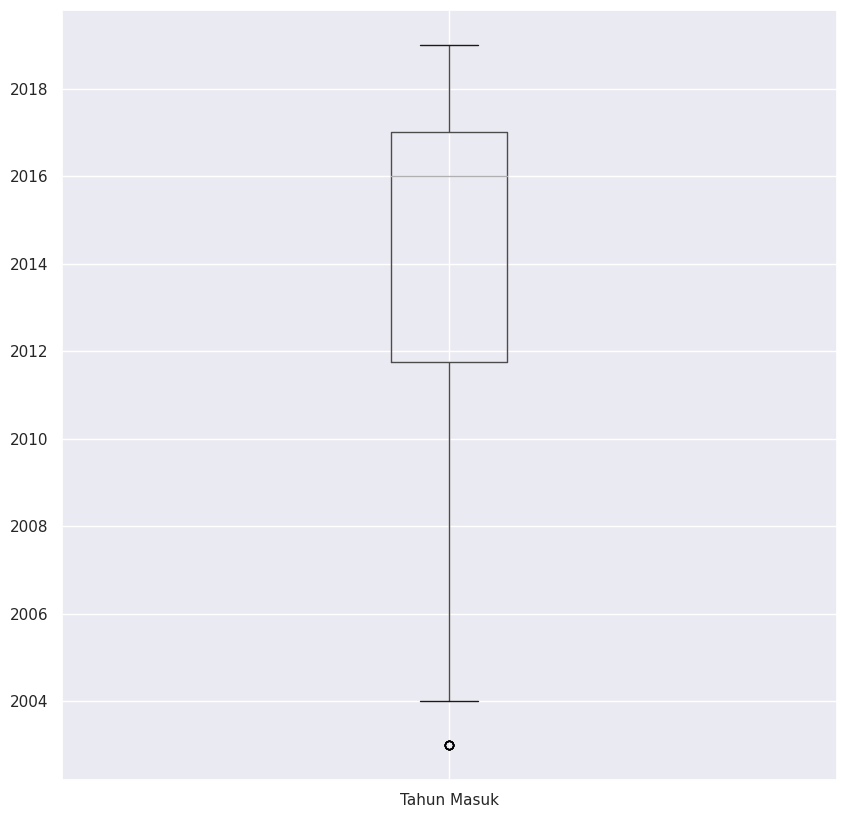

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
no_outlier1.boxplot(column=['Tahun Masuk'])
plt.show

In [ ]:
Q1 = dataset3['Tahun Wisuda'].quantile(0.25)
Q2 = dataset3['Tahun Wisuda'].quantile(0.50)
Q3 = dataset3['Tahun Wisuda'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset3['Tahun Wisuda'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset3['Tahun Wisuda'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Wisuda lama = dataset3.loc[outliers_bawah]
#wisuda baru = dataset3.loc[outliers_atas]

no_outlier2 = dataset3[(dataset3['Tahun Wisuda'] >= Q1 - 1.5 * IQR) & (dataset3['Tahun Wisuda'] <= Q3 + 1.5 *IQR)]
no_outlier2

Q1=2016.0, Q3=2022.0, IQR=6.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
5,Karyawan Swasta,Kurang dari 3 bulan.,-,Account Payable Accountant,-,-,6,2019.0,2023.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

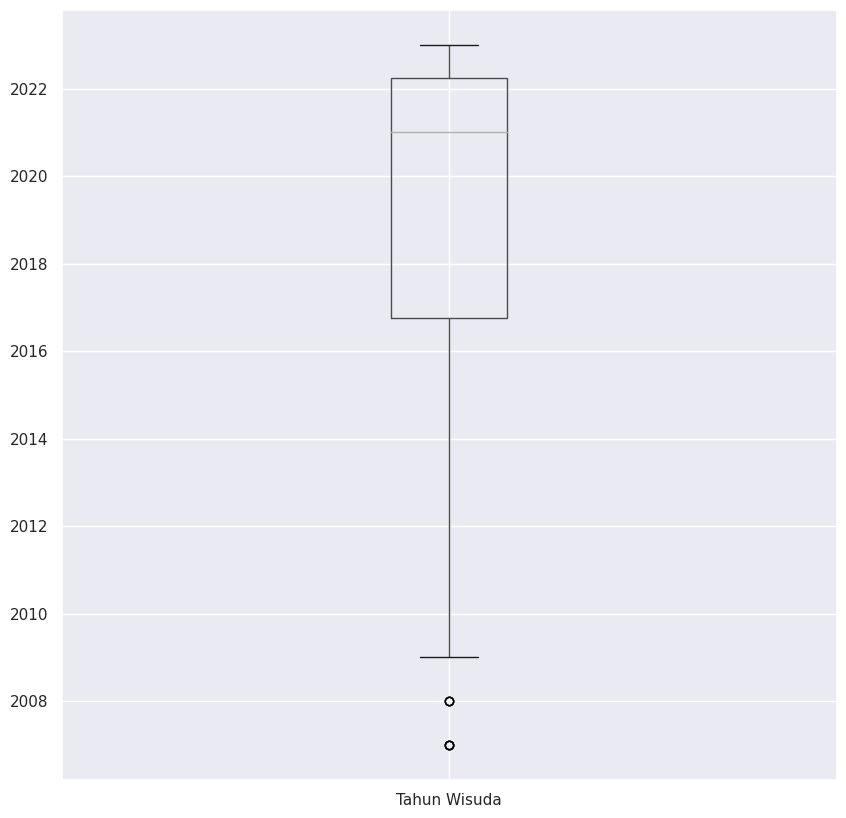

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
no_outlier2.boxplot(column=['Tahun Wisuda'])
plt.show

In [ ]:
Q1 = dataset3['Kesesuaian Kurikulum:'].quantile(0.25)
Q2 = dataset3['Kesesuaian Kurikulum:'].quantile(0.50)
Q3 = dataset3['Kesesuaian Kurikulum:'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset3['Kesesuaian Kurikulum:'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset3['Kesesuaian Kurikulum:'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Kurikulum tidak sesuai = dataset3.loc[outliers_bawah]
#Kurikulum sesuai= dataset3.loc[outliers_atas]

no_outlier3= dataset3[(dataset3['Kesesuaian Kurikulum:'] >= Q1 - 1.5 * IQR) & (dataset3['Kesesuaian Kurikulum:'] <= Q3 + 1.5 *IQR)]
no_outlier3

Q1=3.0, Q3=4.0, IQR=1.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

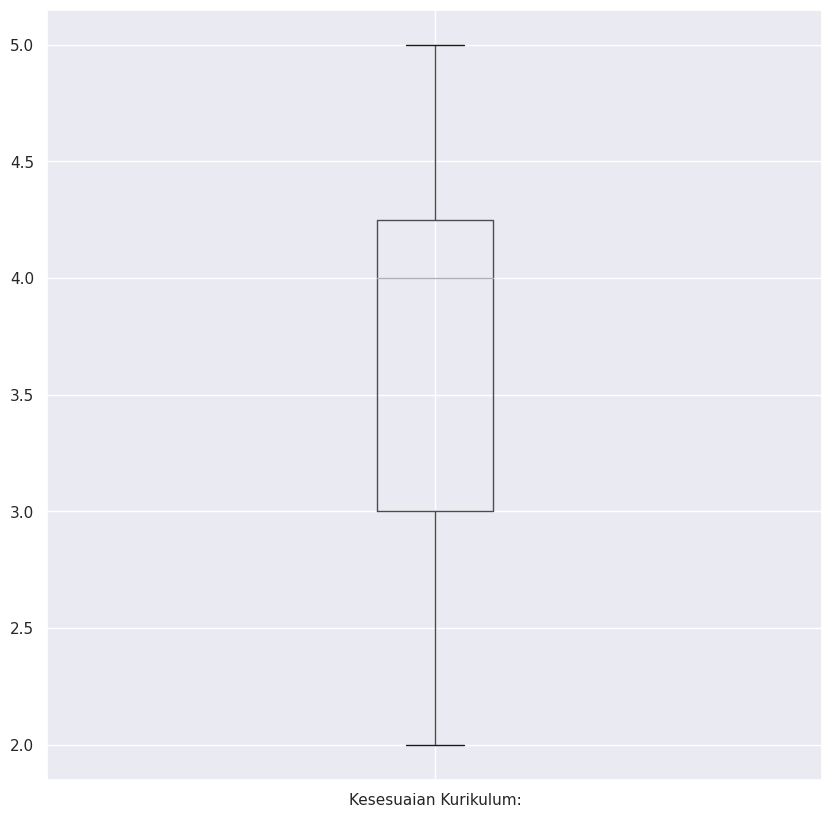

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
no_outlier3.boxplot(column=['Kesesuaian Kurikulum:'])
plt.show

In [ ]:
Q1 = dataset3['Kesesuaian Bidang Ilmu:'].quantile(0.25)
Q2 = dataset3['Kesesuaian Bidang Ilmu:'].quantile(0.50)
Q3 = dataset3['Kesesuaian Bidang Ilmu:'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset3['Kesesuaian Kurikulum:'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset3['Kesesuaian Kurikulum:'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Bidang Ilmu tidak sesuai = dataset3.loc[outliers_bawah]
#Bidang Ilmu sesuai= dataset3.loc[outliers_atas]

no_outlier4 = dataset3[(dataset3['Kesesuaian Bidang Ilmu:'] >= Q1 - 1.5 * IQR) & (dataset3['Kesesuaian Bidang Ilmu:'] <= Q3 + 1.5 *IQR)]
no_outlier4

Q1=3.0, Q3=4.0, IQR=1.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

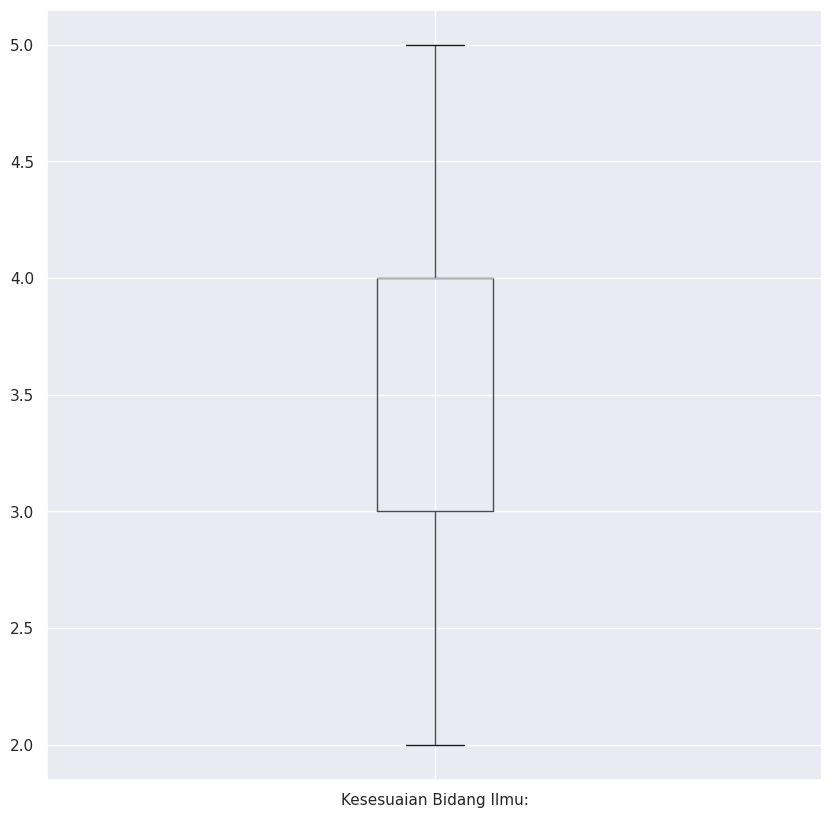

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
no_outlier4.boxplot(column='Kesesuaian Bidang Ilmu:')
plt.show